# Random Forest

## Data
* From kaggle dataset: https://www.kaggle.com/camnugent/california-housing-prices

* Originally in Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.
* 1990 census data housing price
* has 10 columns: longitude, latitude,housingmedianage, total_rooms ,total_bedrooms,population,households,median_income,medianhousevalue,ocean_proximity

In [2]:
import pandas as pd
df = pd.read_csv('./others/housing.csv')
df.drop(columns=['longitude', 'latitude','ocean_proximity'], inplace=True)
df.dropna(inplace=True)

In [4]:
df.describe

<bound method NDFrame.describe of        housing_median_age  total_rooms  total_bedrooms  population  \
0                    41.0        880.0           129.0       322.0   
1                    21.0       7099.0          1106.0      2401.0   
2                    52.0       1467.0           190.0       496.0   
3                    52.0       1274.0           235.0       558.0   
4                    52.0       1627.0           280.0       565.0   
...                   ...          ...             ...         ...   
20635                25.0       1665.0           374.0       845.0   
20636                18.0        697.0           150.0       356.0   
20637                17.0       2254.0           485.0      1007.0   
20638                18.0       1860.0           409.0       741.0   
20639                16.0       2785.0           616.0      1387.0   

       households  median_income  median_house_value  
0           126.0         8.3252            452600.0  
1          1138

## Decision Trees
* does not require any transformation of the data
* maximizes the information gain (IG) : $IG(D_p,x_i) = I(D_p) - \frac{N_{left}}{N_p} I(D_{left}) - \frac{N_{right}}{N_p}I(D_{right})$ where $x_i$ is the feature to perfrom the split, $N_p$ is the number of training examples in the parent node, I is the impurity function, $D_p$ subest of training examples in the parent node
* want to find the feature split that reduces the impurities in the child nodes most
* to use a decision tree for regression, we need one for continous variable, so we define the impurity measure of a node t as the MSE: I(t) = MSE(t) = $\frac{1}{N_t} \sum_{i \in D_t} (y^{(i)}-\hat{y}_t)^2$
    * where $N_t$ is the number of traiing examples at node t, $D_t$ is the training subset at node t, $y^{(i)}$ the true target value and $\hat{y}_t$ the predcited target value(sample mean)
    * $\hat{y}_t = \frac{1}{N_t} \sum_{i\in D_t} y^{(i)}$
    * MSE often referred to as within-node variance
    * splitting criteron called variance reduction

In [7]:
import matplotlib.pyplot as plt
# want to plot the scatterplot of the training exampels and the regression line
def linregplot(X,y,model):
    plt.scatter(X,y,c='steelblue',edgecolor='white',s=70)
    plt.plot(X,model.predict(X),c='black',lw=2)
    return None

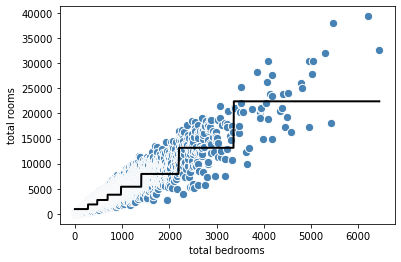

In [8]:
from sklearn.tree import DecisionTreeRegressor
X = df[['total_bedrooms']].values
y = df['total_rooms'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X,y)
sort_idx = X.flatten().argsort()
linregplot(X[sort_idx],y[sort_idx],tree)
plt.xlabel('total bedrooms')
plt.ylabel('total rooms')
plt.show()

## Random Forests
* ensemble of multiple decision trees
* sum of piecewise linear functions
* subdivide the input space into smaller regions that become more manageable
* less sensitive to outliers


In [12]:
#use all featuers in Housing dataset to fit a random forest regression model
from sklearn.model_selection import train_test_split
# take all except the median house price as features
X = df.iloc[:,:-1].values
y = df['median_house_value'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f'%(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f'%(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

# still overfitting, since train R2 is high but test R2 is low

MSE train: 603448261.749, test: 4449398422.913
R^2 train: 0.955, test: 0.665


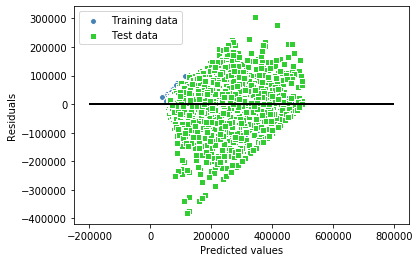

In [14]:
# plotting residual plots
plt.scatter(y_train_pred,(y_train_pred - y_train), c='steelblue',marker='o', edgecolor='white',label='Training data')
plt.scatter(y_test_pred,(y_test_pred - y_test), c='limegreen',marker='s', edgecolor='white',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-200000, xmax=800000,lw=2, color='black')
plt.show()